  1.Import required libraries

In [95]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import cv2
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

  2.Load the data set

In [97]:
data_dir='D:\wasteclassifier-main\wasteclassifier-main\dataset-resized'
categories=os.listdir(data_dir)
print(categories)

['cardboard', 'glass', 'metal', 'nothing', 'organic', 'paper', 'plastic', 'trash']


In [99]:
#setting parameters for images and dataset
img_size=(180,180)
batch_size=32

  3.Spliting it into training and validation

In [101]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=15,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                 shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.2)
train_data=train_datagen.flow_from_directory(data_dir,target_size=img_size,batch_size=batch_size,class_mode='categorical',subset='training')

validation_data=train_datagen.flow_from_directory(data_dir,target_size=img_size,batch_size=batch_size,class_mode='categorical',subset='validation')

Found 3558 images belonging to 8 classes.
Found 886 images belonging to 8 classes.


In [103]:
#Getting the classes map
class_labels=train_data.class_indices
class_labels={v:k for k, v in class_labels.items()}
print(class_labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'nothing', 4: 'organic', 5: 'paper', 6: 'plastic', 7: 'trash'}


In [105]:
train_images,train_labels=next(train_data)
print(train_images.shape)
print(train_labels.shape)

(32, 180, 180, 3)
(32, 8)


  4.Bulid the CNN model

In [146]:
#making the layers of the model
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(img_size[0],img_size[1],3)),
                 MaxPooling2D((2,2)),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),
                 Conv2D(128,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),
                Flatten(),
                Dense(512,activation='relu'),
                  Dropout(0.5),
            Dense(len(train_data.class_indices),activation='softmax')])


In [108]:
#displaying model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,312,264 (100.37 MB)

 Trainable params: 26,312,264 (100.37 MB)

 Non-trainable params: 0 (0.00 B)

  5.Training the model

In [111]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(train_data,epochs=30,validation_data=validation_data,callbacks=[early_stop])

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 578s 5s/step - accuracy: 0.3925 - loss: 1.7032 - val_accuracy: 0.4661 - val_loss: 1.2053
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.5984 - loss: 1.0683 - val_accuracy: 0.6467 - val_loss: 0.9615
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 594s 5s/step - accuracy: 0.6509 - loss: 0.9395 - val_accuracy: 0.6501 - val_loss: 0.9053
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 917s 8s/step - accuracy: 0.7129 - loss: 0.8250 - val_accuracy: 0.6964 - val_loss: 0.8311
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 948s 6s/step - accuracy: 0.7311 - loss: 0.7297 - val_accuracy: 0.7020 - val_loss: 0.8416
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.7458 - loss: 0.7059 - val_accuracy: 0.6603 - val_loss: 0.8845
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 439s 4s/step - accuracy: 0.7316 - loss: 0.7161 - val_accuracy: 0.7133 - val_loss: 0.8200
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.7667 - loss: 0.6574 - val_accu

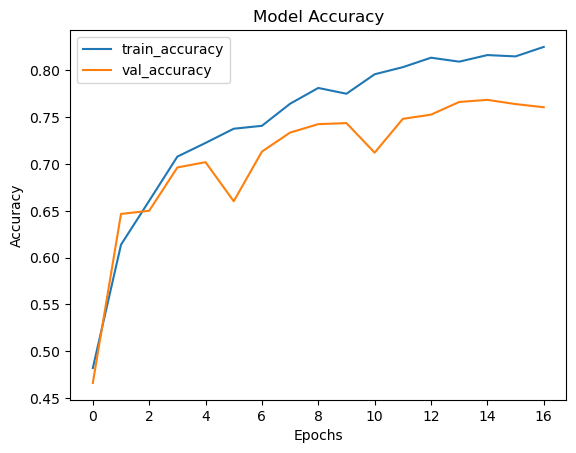

In [65]:
#plot training and validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [71]:
#save the model
from tensorflow.keras.models import load_model
model.save('D:\wastemodels\modelsave.hdf5')

    6.predict the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
accuracy: 76.42 %
Predicted category: metal


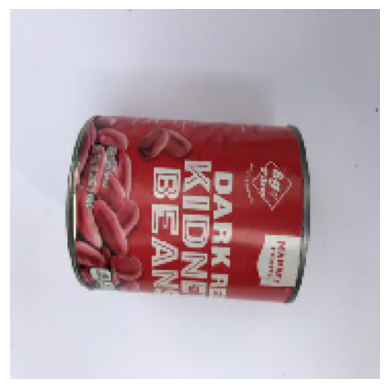

In [53]:
from tensorflow.keras.preprocessing import image

def predict_waste_category(img_path,model):
    img=image.load_img(img_path,target_size=(180,180))
    plt.axis("off")
    plt.imshow(img)
    img_array=image.img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    class_index=np.argmax(prediction,axis=1)[0]
    class_label=list(train_data.class_indices.keys())[class_index]
    predicted_accuracy=round(np.max(prediction)*100,2)
    print("accuracy:",predicted_accuracy,"%")
    return class_label
img_path='D:\dataset-resized\metal\metal62.jpg'
predicted_category=predict_waste_category(img_path,model)
print("Predicted category:",predicted_category,)

                                        REAL TIME WASTE SORTING:

In [144]:
# Load the trained model
model = tf.keras.models.load_model('D:\wastemodels\modelsave.hdf5')

# Initialize video capture
cap = cv2.VideoCapture(0)  # Use 0 for default camera

while True:
    # Read frame from video capture
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Preprocess frame
    
    frame_resized = cv2.resize(frame, (180, 180))
    frame_resized=frame_resized/255.0
    # Make prediction
    prediction = model.predict(frame_resized.reshape((1, 180, 180, 3)))
    
    # Get predicted class
    predicted_class = np.argmax(prediction)

# Map predicted class to waste type
    waste_types = [ 'cardboard','glass', 'metal','nothing','organic', 'paper','plastic','trash']
    predicted_waste_type = waste_types[predicted_class]
    
    # Display prediction
    cv2.putText(frame, f'Predicted waste type: {predicted_waste_type}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display frame
    cv2.imshow('Waste Sorting', frame)
    
    # Exit on key press
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

# Release video capture and close window
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/st